In [ ]:
# To check for GPU
!nvidia-smi


Mon Nov 20 04:19:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-11-20 04:19:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-20 04:19:25 (120 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves , create_tensorboard_callback , unzip_data , walk_through_dir

In [ ]:
unzip_data("/content/drive/MyDrive/PBLproject/BrainTumorCNNzipped.zip")

In [ ]:
walk_through_dir("BrainTumorCNN")

There are 2 directories and 1 images in 'BrainTumorCNN'.
There are 4 directories and 1 images in 'BrainTumorCNN/Training'.
There are 0 directories and 827 images in 'BrainTumorCNN/Training/pituitary_tumor'.
There are 0 directories and 395 images in 'BrainTumorCNN/Training/no_tumor'.
There are 0 directories and 826 images in 'BrainTumorCNN/Training/glioma_tumor'.
There are 0 directories and 822 images in 'BrainTumorCNN/Training/meningioma_tumor'.
There are 4 directories and 1 images in 'BrainTumorCNN/Testing'.
There are 0 directories and 74 images in 'BrainTumorCNN/Testing/pituitary_tumor'.
There are 0 directories and 105 images in 'BrainTumorCNN/Testing/no_tumor'.
There are 0 directories and 100 images in 'BrainTumorCNN/Testing/glioma_tumor'.
There are 0 directories and 115 images in 'BrainTumorCNN/Testing/meningioma_tumor'.


In [ ]:
# Set Directories
train_dir = "/content/BrainTumorCNN/Training"
test_dir = "/content/BrainTumorCNN/Testing"

In [ ]:
# Import tensorflow
import tensorflow as tf

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/BrainTumorCNN/Training")
class_names = np.array(sorted([item.name for item in data_dir.glob("*") if not item.name.startswith('.')]))
print(class_names)


['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


In [ ]:
# Creating Data Loaders

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = BATCH_SIZE,
                                                                 label_mode = "categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE,
                                                                label_mode = "categorical")



Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [ ]:
# Getting to know about our data
train_data.class_names , test_data.class_names

(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
 ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])

# Creating the model with Functional API

Creating a base model without data augmentation for future refrences

In [ ]:
# using tf.keras.application to get EffecientnetV2b0
imported_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False) # include_top to false means we can customize the output layer

# freeze input layers of imported model
imported_model.trainable= False

# input layer
inputs = tf.keras.layers.Input(shape = (224,224,3), name="input_layer")

# putting input layer through our model
x = imported_model(inputs)

# Putting our model through PoolingLayer
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

# Outputs
output = tf.keras.layers.Dense(4,activation = "softmax",  name ="output_layer")(x)

# Create the model with inputs and output
model_0 = tf.keras.Model(inputs, output)

# Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_base_model = model_0.fit(train_data,
                                 epochs = 10,
                                 steps_per_epoch = len(train_data),
                                 validation_data = test_data,
                                 validation_steps = len(test_data),
                                 callbacks = [create_tensorboard_callback("PBLproject","basemodel_featureExtraction")])




24274472/24274472 [==============================] - 0s 0us/step
Saving TensorBoard log files to: PBLproject/basemodel_featureExtraction/20231120-041954
Epoch 1/10
90/90 [==============================] - 32s 134ms/step - loss: 0.8561 - accuracy: 0.6686 - val_loss: 1.0637 - val_accuracy: 0.5228
Epoch 2/10
90/90 [==============================] - 7s 70ms/step - loss: 0.5277 - accuracy: 0.8108 - val_loss: 1.0358 - val_accuracy: 0.5838
Epoch 3/10
90/90 [==============================] - 7s 69ms/step - loss: 0.4463 - accuracy: 0.8408 - val_loss: 1.0262 - val_accuracy: 0.6091
Epoch 4/10
90/90 [==============================] - 9s 100ms/step - loss: 0.3914 - accuracy: 0.8575 - val_loss: 0.9820 - val_accuracy: 0.6294
Epoch 5/10
90/90 [==============================] - 7s 69ms/step - loss: 0.3665 - accuracy: 0.8690 - val_loss: 0.9552 - val_accuracy: 0.6472
Epoch 6/10
90/90 [==============================] - 9s 99ms/step - loss: 0.3452 - accuracy: 0.8774 - val_loss: 0.9919 - val_accuracy: 0.649

(None,)

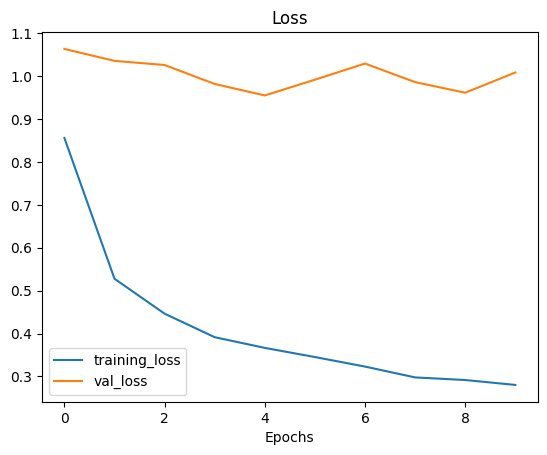

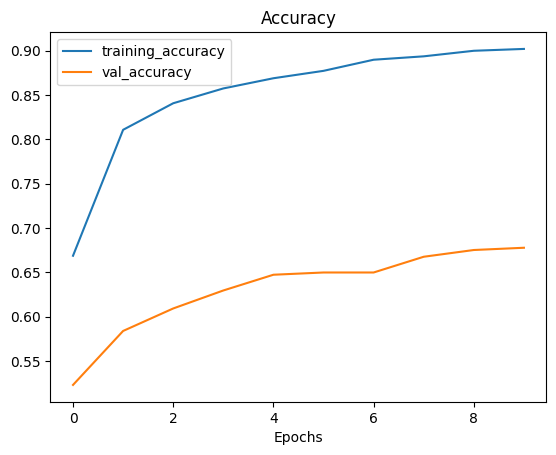

In [ ]:
plot_loss_curves(history_base_model) ,

# Our scores might be average but the graph shows us that the results are not good as the curves are not close to each other , and there is a lot of gap between them, which could mean overfitting

## Create Data Augmentation layer using sequential api



In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


# We used preprocessing for data augmentation because it is done on the gpu and also it is faster than ImageDataGenerator

In [ ]:
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
], name = "data_augmentaion")


In [ ]:
# Creating our second model to improve it
imported_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
imported_model.trainable = False

# Creating input layer
inputs = tf.keras.layers.Input(shape = (224,224,3), name="input_layer")

# Put inputs through data augmentation
x = data_augmentation(inputs)

# put data augmented layer into imported model
x = imported_model(x, training =False)

#Pool output from base model
x = tf.keras.layers.GlobalAveragePooling2D(name="average_global_pooling2D")(x)

# pool output from imported model
output = tf.keras.layers.Dense(4,activation = "softmax",  name ="output_layer")(x)

# Create the model
model_1 = tf.keras.Model(inputs, output)

# Compile the model

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback("PBLproject", "same_model_with_data_aug")])

Saving TensorBoard log files to: PBLproject/same_model_with_data_aug/20231120-042159
Epoch 1/10
90/90 [==============================] - 58s 539ms/step - loss: 0.9404 - accuracy: 0.6247 - val_loss: 1.1744 - val_accuracy: 0.4264
Epoch 2/10
90/90 [==============================] - 34s 364ms/step - loss: 0.6541 - accuracy: 0.7638 - val_loss: 1.0875 - val_accuracy: 0.5178
Epoch 3/10
90/90 [==============================] - 34s 373ms/step - loss: 0.5586 - accuracy: 0.8028 - val_loss: 1.0756 - val_accuracy: 0.5508
Epoch 4/10
90/90 [==============================] - 29s 317ms/step - loss: 0.5090 - accuracy: 0.8167 - val_loss: 1.0975 - val_accuracy: 0.5558
Epoch 5/10
90/90 [==============================] - 24s 254ms/step - loss: 0.4768 - accuracy: 0.8341 - val_loss: 1.0893 - val_accuracy: 0.5533
Epoch 6/10
90/90 [==============================] - 27s 300ms/step - loss: 0.4580 - accuracy: 0.8341 - val_loss: 1.0363 - val_accuracy: 0.5812
Epoch 7/10
90/90 [==============================] - 24s 2

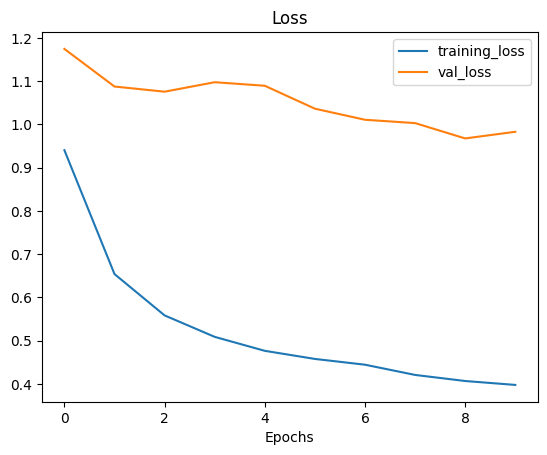

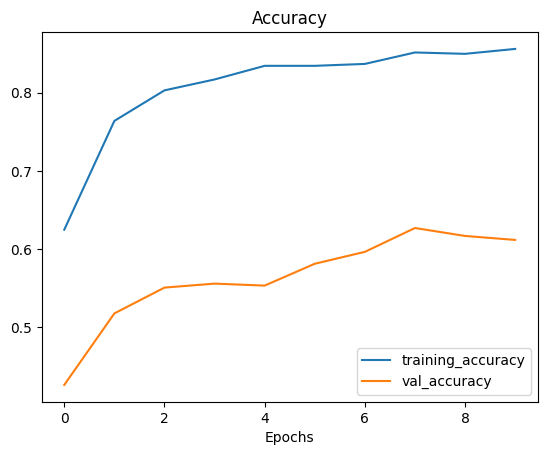

In [ ]:
plot_loss_curves(history_1)

# Using EffecientNet B3

In [ ]:
# using tf.keras.application to get EfficientNetB3
from tensorflow.keras.applications import EfficientNetB3

imported_model_new = EfficientNetB3(include_top=False, weights='imagenet') # include_top to false means we can customize the output layer

# freeze input layers of imported model
imported_model_new.trainable= False

# input layer
inputs = tf.keras.layers.Input(shape = (224,224,3), name="input_layer")

# putting input layer through our model
x = imported_model_new(inputs)

# Putting our model through PoolingLayer
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

# Outputs
output = tf.keras.layers.Dense(4,activation = "softmax",  name ="output_layer")(x)

# Create the model with inputs and output
model_2 = tf.keras.Model(inputs, output)

# Compile the model
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_base_model = model_2.fit(train_data,
                                 epochs = 10,
                                 steps_per_epoch = len(train_data),
                                 validation_data = test_data,
                                 validation_steps = len(test_data),
                                 callbacks = [create_tensorboard_callback("PBLproject","basemodel_featureExtraction")])




43941136/43941136 [==============================] - 0s 0us/step
Saving TensorBoard log files to: PBLproject/basemodel_featureExtraction/20231120-042808
Epoch 1/10
90/90 [==============================] - 29s 189ms/step - loss: 0.8291 - accuracy: 0.6794 - val_loss: 1.0564 - val_accuracy: 0.5609
Epoch 2/10
90/90 [==============================] - 14s 143ms/step - loss: 0.5222 - accuracy: 0.8136 - val_loss: 1.0021 - val_accuracy: 0.6041
Epoch 3/10
90/90 [==============================] - 13s 145ms/step - loss: 0.4375 - accuracy: 0.8432 - val_loss: 0.9861 - val_accuracy: 0.6117
Epoch 4/10
90/90 [==============================] - 13s 144ms/step - loss: 0.3953 - accuracy: 0.8585 - val_loss: 1.0070 - val_accuracy: 0.6523
Epoch 5/10
90/90 [==============================] - 13s 145ms/step - loss: 0.3591 - accuracy: 0.8693 - val_loss: 0.9420 - val_accuracy: 0.6599
Epoch 6/10
90/90 [==============================] - 13s 143ms/step - loss: 0.3401 - accuracy: 0.8784 - val_loss: 0.9890 - val_accura

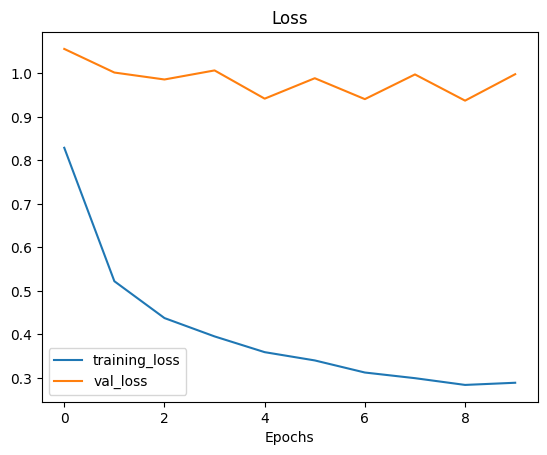

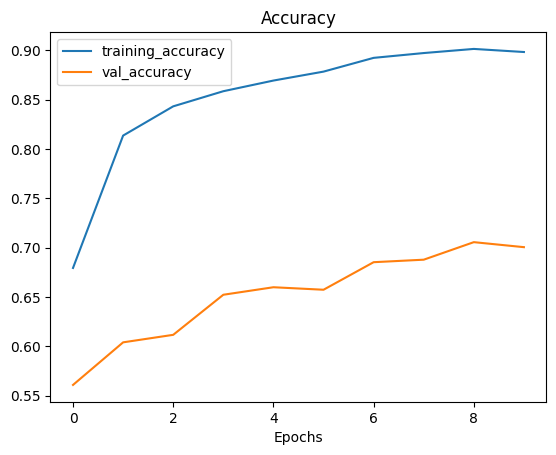

In [ ]:
plot_loss_curves(history_base_model)

In [ ]:
# using tf.keras.application to get EffecientnetV2b0
from tensorflow.keras.applications import EfficientNetB3

imported_model_new = EfficientNetB3(include_top=False, weights='imagenet') # include_top to false means we can customize the output layer

# freeze input layers of imported model
imported_model_new.trainable= False

# Creating input layer
inputs = tf.keras.layers.Input(shape = (224,224,3), name="input_layer")

# Put inputs through data augmentation
x = data_augmentation(inputs)

# put data augmented layer into imported model
x = imported_model(x, training =False)

#Pool output from base model
x = tf.keras.layers.GlobalAveragePooling2D(name="average_global_pooling2D")(x)

# pool output from imported model
output = tf.keras.layers.Dense(4,activation = "softmax",  name ="output_layer")(x)

# Create the model
model_3 = tf.keras.Model(inputs, output)

# Compile the model

model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

# Fit the model
history_2_augmented = model_3.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback("PBLproject", "B3_model_with_data_aug")])

Saving TensorBoard log files to: PBLproject/B3_model_with_data_aug/20231120-043128
Epoch 1/10
90/90 [==============================] - 30s 231ms/step - loss: 0.9614 - accuracy: 0.6049 - val_loss: 1.1775 - val_accuracy: 0.4442
Epoch 2/10
90/90 [==============================] - 18s 195ms/step - loss: 0.6537 - accuracy: 0.7686 - val_loss: 1.0848 - val_accuracy: 0.5279
Epoch 3/10
90/90 [==============================] - 19s 205ms/step - loss: 0.5805 - accuracy: 0.7833 - val_loss: 1.0785 - val_accuracy: 0.5558
Epoch 4/10
90/90 [==============================] - 16s 178ms/step - loss: 0.5155 - accuracy: 0.8143 - val_loss: 1.0497 - val_accuracy: 0.5711
Epoch 5/10
90/90 [==============================] - 18s 194ms/step - loss: 0.4794 - accuracy: 0.8282 - val_loss: 1.0538 - val_accuracy: 0.5838
Epoch 6/10
90/90 [==============================] - 17s 189ms/step - loss: 0.4735 - accuracy: 0.8286 - val_loss: 1.0315 - val_accuracy: 0.5888
Epoch 7/10
90/90 [==============================] - 17s 188

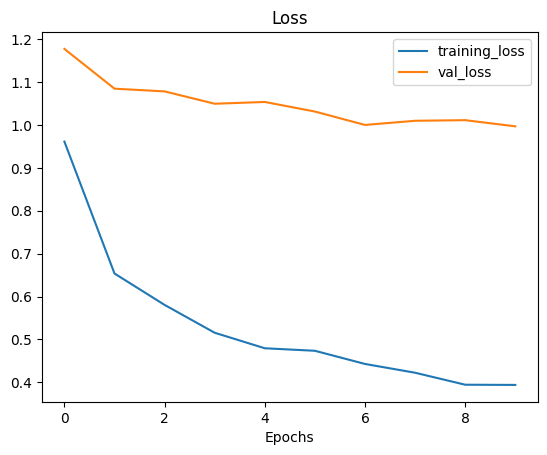

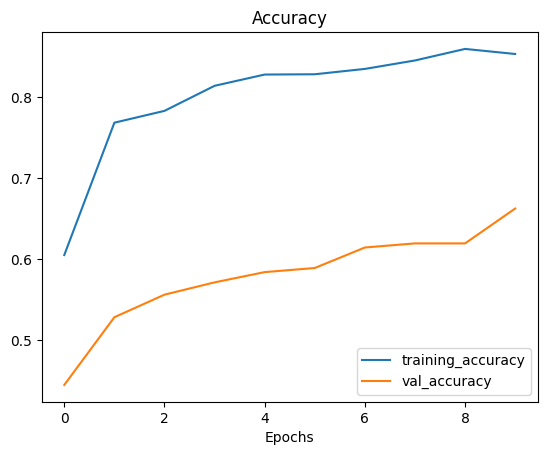

In [ ]:
plot_loss_curves(history_2_augmented)

In [ ]:
# using tf.keras.application to get EfficientNet B5


imported_model_new_eff =tf.keras.applications.EfficientNetB5(include_top = False) # include_top to false means we can customize the output layer

# freeze input layers of imported model
imported_model_new_eff.trainable= False

# input layer
inputs = tf.keras.layers.Input(shape = (224,224,3), name="input_layer")

# putting input layer through our model
x = imported_model_new_eff(inputs)

# Putting our model through PoolingLayer
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

# Outputs
output = tf.keras.layers.Dense(4,activation = "softmax",  name ="output_layer")(x)

# Create the model with inputs and output
model_4 = tf.keras.Model(inputs, output)

# Compile the model
model_4.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_newlasteff_model = model_4.fit(train_data,
                                 epochs = 10,
                                 steps_per_epoch = len(train_data),
                                 validation_data = test_data,
                                 validation_steps = len(test_data),
                                 callbacks = [create_tensorboard_callback("PBLproject","eff5")])




115263384/115263384 [==============================] - 1s 0us/step
Saving TensorBoard log files to: PBLproject/eff5/20231120-043516
Epoch 1/10
90/90 [==============================] - 45s 307ms/step - loss: 0.8129 - accuracy: 0.6889 - val_loss: 0.9791 - val_accuracy: 0.5812
Epoch 2/10
90/90 [==============================] - 23s 249ms/step - loss: 0.5412 - accuracy: 0.8063 - val_loss: 0.9284 - val_accuracy: 0.6294
Epoch 3/10
90/90 [==============================] - 22s 245ms/step - loss: 0.4588 - accuracy: 0.8422 - val_loss: 0.8739 - val_accuracy: 0.6650
Epoch 4/10
90/90 [==============================] - 23s 247ms/step - loss: 0.4081 - accuracy: 0.8557 - val_loss: 0.8392 - val_accuracy: 0.7056
Epoch 5/10
90/90 [==============================] - 22s 246ms/step - loss: 0.3793 - accuracy: 0.8655 - val_loss: 0.8579 - val_accuracy: 0.6929
Epoch 6/10
90/90 [==============================] - 22s 245ms/step - loss: 0.3601 - accuracy: 0.8711 - val_loss: 0.8882 - val_accuracy: 0.6929
Epoch 7/10

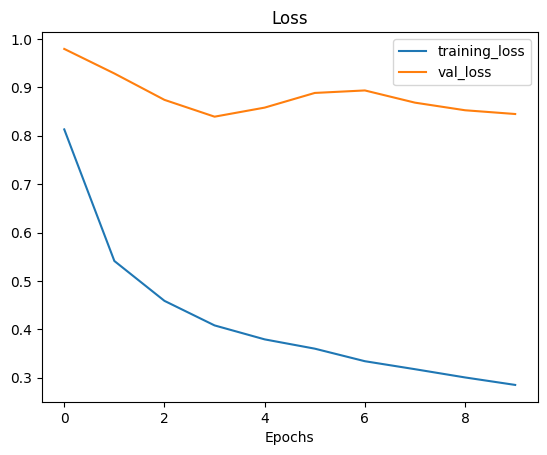

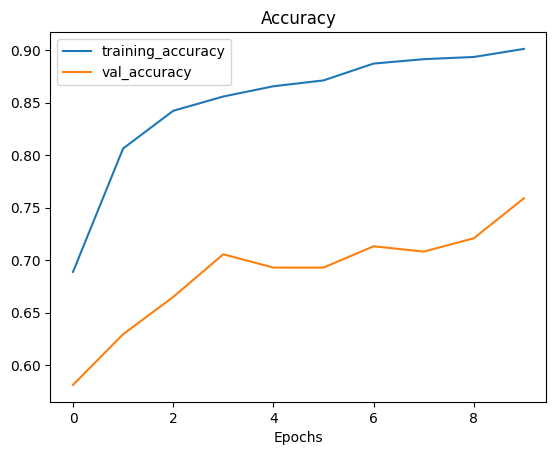

In [ ]:
plot_loss_curves(history_newlasteff_model)

In [ ]:
# Creating our second model to improve it
# DATA AUGMENTATION
imported_model_new_eff_dataaug =tf.keras.applications.EfficientNetB5(include_top = False) # include_top to false means we can customize the output layer

# freeze input layers of imported model
imported_model_new_eff_dataaug.trainable= False

# Creating input layer
inputs = tf.keras.layers.Input(shape = (224,224,3), name="input_layer")

# Put inputs through data augmentation
x = data_augmentation(inputs)

# put data augmented layer into imported model
x = imported_model(x, training =False)

#Pool output from base model
x = tf.keras.layers.GlobalAveragePooling2D(name="average_global_pooling2D")(x)

# pool output from imported model
output = tf.keras.layers.Dense(4,activation = "softmax",  name ="output_layer")(x)

# Create the model
model_5 = tf.keras.Model(inputs, output)

# Compile the model

model_5.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

# Fit the model
history_1_data_aug_eff5 = model_5.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback("PBLproject", "eff5_data_aug")])

Saving TensorBoard log files to: PBLproject/eff5_data_aug/20231120-044101
Epoch 1/10
90/90 [==============================] - 27s 198ms/step - loss: 0.9611 - accuracy: 0.6129 - val_loss: 1.1314 - val_accuracy: 0.4442
Epoch 2/10
90/90 [==============================] - 15s 165ms/step - loss: 0.6490 - accuracy: 0.7655 - val_loss: 1.0805 - val_accuracy: 0.5406
Epoch 3/10
90/90 [==============================] - 15s 164ms/step - loss: 0.5473 - accuracy: 0.8028 - val_loss: 1.1082 - val_accuracy: 0.5355
Epoch 4/10
90/90 [==============================] - 16s 173ms/step - loss: 0.5192 - accuracy: 0.8073 - val_loss: 1.1336 - val_accuracy: 0.5431
Epoch 5/10
90/90 [==============================] - 15s 168ms/step - loss: 0.4839 - accuracy: 0.8251 - val_loss: 1.0523 - val_accuracy: 0.5990
Epoch 6/10
90/90 [==============================] - 15s 163ms/step - loss: 0.4558 - accuracy: 0.8362 - val_loss: 1.0279 - val_accuracy: 0.6117
Epoch 7/10
90/90 [==============================] - 15s 158ms/step -

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
 #Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename , img_shape=224):

  """
  Reads an image from filename , turns it into a tensor and reshapes into (img_shape,img_shape ,colour_channels)
  """


  # Read an image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape,img_shape])

  # Ensure the image has 3 color channels (RGB)
  img = tf.cond(tf.shape(img)[-1] == 4, lambda: img[..., :3], lambda: img)

  # Rescale the pixels between 0 and 1
  img = img/255.

  return img

In [ ]:
def pred_and_plot(model, filename,  class_names=class_names):
  """
  Imports an image located at filename , makes a prediction with model and plots the image with predicted class as the title
  """

  # Import the target image and and preprocess it
  img = load_and_prep_image(filename)

  # make a predictions
  pred= model.predict(tf.expand_dims(img, axis = 0))
  print(pred)



  # Add in logic for multiclass
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction is {pred_class} ")
  plt.axis(False);

1/1 [==============================] - 0s 135ms/step
[[0.58041406 0.14358248 0.21004714 0.0659563 ]]


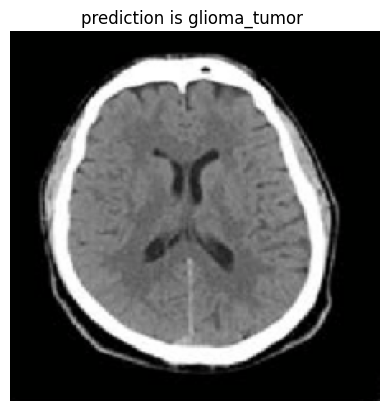

In [ ]:
pred_and_plot(model_5 , "/content/BrainTumorCNN/Screenshot 2023-11-06 at 2.22.45 AM.png")


1/1 [==============================] - 0s 28ms/step
[[0.5677828  0.14835475 0.21569614 0.0681663 ]]


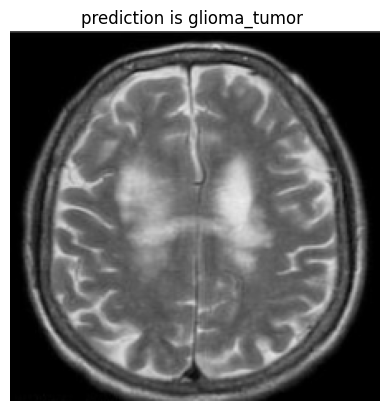

In [ ]:
pred_and_plot(model_5, "/content/BrainTumorCNN/Testing/no_tumor/image(18).jpg")